## EDA and Feature Engineering of Google Play Store Dataset 

1. Problem Statemtn: today 1.85 million different apps are available for users to download. Android users have even more from which to choose,with 2.56 million available through the google play store. These apps have come to play a huge role in the way we live our lives today.

our objective is to find the most popular category, find the app with largest number of installs, the app with largest size etc.

2. Data Collection.

The data consists of 20 column and 10841 rows.

## Steps we are going to follow 

1. Data Cleaning 
2. Exploratory Data Analysis
3. Feature Engineering.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [39]:
df = pd.read_csv('googleplaystore.csv')

df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [40]:
df.shape


(799999, 24)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799999 entries, 0 to 799998
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           799998 non-null  object 
 1   App Id             799999 non-null  object 
 2   Category           799999 non-null  object 
 3   Rating             792086 non-null  float64
 4   Rating Count       792086 non-null  float64
 5   Installs           799963 non-null  object 
 6   Minimum Installs   799963 non-null  float64
 7   Maximum Installs   799999 non-null  int64  
 8   Free               799999 non-null  bool   
 9   Price              799999 non-null  float64
 10  Currency           799947 non-null  object 
 11  Size               799932 non-null  object 
 12  Minimum Android    797783 non-null  object 
 13  Developer Id       799991 non-null  object 
 14  Developer Website  536705 non-null  object 
 15  Developer Email    799992 non-null  object 
 16  Re

In [42]:
# Summary of the dataset 

df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,792086.000000,7.920860e+05,7.999630e+05,7.999990e+05,799999.000000
mean,2.203589,2.910340e+03,1.644477e+05,2.874675e+05,0.101888
std,2.106622,2.577076e+05,9.982313e+06,1.492685e+07,2.574308
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,5.000000e+01,8.400000e+01,0.000000
50%,2.900000,6.000000e+00,5.000000e+02,6.940000e+02,0.000000
75%,4.300000,4.200000e+01,5.000000e+03,7.345000e+03,0.000000
max,5.000000,1.385576e+08,5.000000e+09,6.265638e+09,400.000000


In [43]:
# Missing values 

df.isnull().sum()

App Name                  1
App Id                    0
Category                  0
Rating                 7913
Rating Count           7913
Installs                 36
Minimum Installs         36
Maximum Installs          0
Free                      0
Price                     0
Currency                 52
Size                     67
Minimum Android        2216
Developer Id              8
Developer Website    263294
Developer Email           7
Released              24440
Last Updated              0
Content Rating            0
Privacy Policy       145391
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

## Insights and observation 

The dataset has missing values.

In [44]:
df.head(2)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35


### Data Cleaning

In [45]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [46]:
df['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [47]:
df[df['Rating'].duplicated()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
11,Parents,com.eqra.android.BSTS.parent,Maps & Navigation,0.0,0.0,100+,100.0,330,True,0.0,...,http://www.hafizquran.com,hhiyassat@eqratech.com,"Jan 10, 2018","Jun 27, 2018",Everyone,https://docs.google.com/document/d/1fpoF-YmfcV...,False,False,False,2021-06-15 20:19:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,WiFi File Transfer Pro,com.smarterdroid.wififiletransferpro,Tools,4.2,20088.0,"100,000+",100000.0,480836,False,1.4,...,http://www.smarterdroid.com,smarterdroid@gmail.com,"Jun 28, 2011","Nov 08, 2013",Everyone,NaN,False,False,False,2021-06-16 09:11:58
799995,Disco Flashlight,com.gopu.torch.flashlight,Tools,3.2,15.0,"1,000+",1000.0,3088,True,0.0,...,http://www.gsoft.com,gopurajesh@gmail.com,"Jul 23, 2016","Jul 24, 2016",Everyone,https://sites.google.com/view/key-flashlight,True,False,False,2021-06-16 09:11:58
799996,Guess the Football Player Team || Football Quiz,com.dewangbhardwaj.footballersnationalteam,Trivia,0.0,0.0,100+,100.0,178,True,0.0,...,http://pub-rsx52-6tw4q.quickappninja.com,dewangbhardwaj49@gmail.com,"Sep 23, 2020","Nov 20, 2020",Everyone,http://pub-rsx52-6tw4q.gameprivacypolicy.com/p...,True,False,False,2021-06-16 09:11:58
799997,Deus Hand,com.tossadar.com.hand,Tools,0.0,0.0,1+,1.0,4,True,0.0,...,http://tossadar.com,kiyanov.eugene@gmail.com,"Sep 2, 2017","Sep 03, 2017",Everyone,http://tossadar.com/handapp/policy,False,False,False,2021-06-16 09:11:58


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799999 entries, 0 to 799998
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           799998 non-null  object 
 1   App Id             799999 non-null  object 
 2   Category           799999 non-null  object 
 3   Rating             792086 non-null  float64
 4   Rating Count       792086 non-null  float64
 5   Installs           799963 non-null  object 
 6   Minimum Installs   799963 non-null  float64
 7   Maximum Installs   799999 non-null  int64  
 8   Free               799999 non-null  bool   
 9   Price              799999 non-null  float64
 10  Currency           799947 non-null  object 
 11  Size               799932 non-null  object 
 12  Minimum Android    797783 non-null  object 
 13  Developer Id       799991 non-null  object 
 14  Developer Website  536705 non-null  object 
 15  Developer Email    799992 non-null  object 
 16  Re

## Removing the duplicate values

In [49]:
df = df.drop_duplicates(subset=['App Id'])

In [50]:
df[df['App Id'].duplicated()]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time


In [51]:
df.shape

(799999, 24)

In [52]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799999 entries, 0 to 799998
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           799998 non-null  object 
 1   App Id             799999 non-null  object 
 2   Category           799999 non-null  object 
 3   Rating             792086 non-null  float64
 4   Rating Count       792086 non-null  float64
 5   Installs           799963 non-null  object 
 6   Minimum Installs   799963 non-null  float64
 7   Maximum Installs   799999 non-null  int64  
 8   Free               799999 non-null  bool   
 9   Price              799999 non-null  float64
 10  Currency           799947 non-null  object 
 11  Size               799932 non-null  object 
 12  Minimum Android    797783 non-null  object 
 13  Developer Id       799991 non-null  object 
 14  Developer Website  536705 non-null  object 
 15  Developer Email    799992 non-null  object 
 16  Re

In [54]:
df.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,799998,799999,799999,792086.000000,7.920860e+05,799963,7.999630e+05,7.999990e+05,799999,799999.000000,...,536705,799992,775559,799999,799999,654608,799999,799999,799999,799999
unique,773551,799999,48,NaN,NaN,21,NaN,NaN,2,NaN,...,329266,418699,4137,3642,6,387570,2,2,2,45812
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,100+,NaN,NaN,True,NaN,...,http://www.subsplash.com/,support@classplus.co,"Feb 19, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,False,False,False,2021-06-16 07:35:57
freq,136,1,83393,NaN,NaN,153297,NaN,NaN,784344,NaN,...,2621,3564,725,3785,699440,2594,401284,732265,799706,29
mean,NaN,NaN,NaN,2.203589,2.910340e+03,NaN,1.644477e+05,2.874675e+05,NaN,0.101888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.106622,2.577076e+05,NaN,9.982313e+06,1.492685e+07,NaN,2.574308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000e+00,NaN,5.000000e+01,8.400000e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.900000,6.000000e+00,NaN,5.000000e+02,6.940000e+02,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.300000,4.200000e+01,NaN,5.000000e+03,7.345000e+03,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Remove exact duplicate rows(whole row)

In [55]:
df=df.drop_duplicates()

In [56]:
df.shape

(799999, 24)

In [ ]:
df = df.drop_duplicates(subset=['App Id'], keep='first')

# Why: each app id should be unique. If you prefer the most recent scrape, use keep='last'.

In [58]:
df.shape

(799999, 24)

In [59]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
# e.g. 'App Name' -> 'app_name', 'Rating Count'->'rating_count'


In [62]:
df.head(2)

,app_name,app_id,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,...,developer_website,developer_email,released,last_updated,content_rating,privacy_policy,ad_supported,in_app_purchases,editors_choice,scraped_time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35


### 5) Convert numeric columns (clean strings---> numeric)

Common dirty columns: rating, rating_count, installs, minimum_installs, maximum_installs, price.

In [64]:
import pandas as pd

# rating, rating_count 

df['rating'] = pd.to_numeric(df['rating'],errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'],errors='coerce')

# installs: remove commas, plus signs and convert 

df['installs'] = df['installs'].astype(str).str.replace('[+,]','', regex=True)
df['installs'] = pd.to_numeric(df['installs'], errors='coerce')


# price: remove currency symbols
df['price'] = df['price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [66]:
df.head(2)

,app_name,app_id,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,...,developer_website,developer_email,released,last_updated,content_rating,privacy_policy,ad_supported,in_app_purchases,editors_choice,scraped_time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35


### 6) Convert booleans / flags

In [ ]:
df['free'] = df['free'].astype(bool) 

# or map {'True':True,'False':False}
# if 'True'/'False' strings:


df['ad_supported'] = df['ad_supported'].map({'True': True, 'False': False})


### 7) Convert dates to datetime

columns: released, last_updated, scraped_time

In [70]:
df['released'] = pd.to_datetime(df['released'], errors='coerce', dayfirst=False)
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df['scraped_time'] = pd.to_datetime(df['scraped_time'], errors='coerce')
# create age feature
df['days_since_update'] = (pd.Timestamp('today') - df['last_updated']).dt.days


In [71]:
df.head(2)

,app_name,app_id,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,...,developer_email,released,last_updated,content_rating,privacy_policy,ad_supported,in_app_purchases,editors_choice,scraped_time,days_since_update
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,10.0,15,True,0.0,...,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,NaN,False,False,2021-06-15 20:19:35,2113
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,5000.0,7662,True,0.0,...,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,NaN,False,False,2021-06-15 20:19:35,1678


### 8) Fix ranges / numeric checks

+ Rating should be 0-5. Remove / NaN outlier.
+ Installs not negative.

In [72]:
df.loc[~df['rating'].between(0,5), 'rating'] = pd.NA
df = df[df['installs'].ge(0) | df['installs'].isna()]


### 9) Handle missing values (strategy)

+ If rating missing: leave NaN or impute median by category (if needed).

+ If developer_email missing: ok; not useful for modeling.

+ For price missing: if free==True, set price=0.

In [73]:
df.loc[df['free']==True, 'price'] = 0
# Impute rating by category median (optional)
df['rating'] = df.groupby('category')['rating'].transform(lambda x: x.fillna(x.median()))


### 10) Text cleaning (names, developer websites)

Strip whitespace, lowercase where helpful

In [74]:
df['app_name'] = df['app_name'].astype(str).str.strip()
df['developer_website'] = df['developer_website'].astype(str).replace('nan', pd.NA)


### 11) Create useful features

is_paid = price > 0

install_band = cut(installs) (small/medium/large)

released_year, last_updated_year

In [75]:
df['is_paid'] = df['price'].fillna(0) > 0
df['released_year'] = df['released'].dt.year
df['install_band'] = pd.cut(df['installs'], bins=[-1,100,1000,10000,100000,1000000,1e10],
                            labels=['<100','100-1k','1k-10k','10k-100k','100k-1M','1M+'])


### 12) Detect and handle outliers (price, installs, rating_count)

Use IQR for numeric columns:

In [76]:
def remove_outliers_iqr(s):
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3-q1
    return s[(s >= q1 - 1.5*iqr) & (s <= q3 + 1.5*iqr)]

# Example: inspect outliers for price
outlier_prices = df[~df['price'].between(df['price'].quantile(0.01), df['price'].quantile(0.99))]


## EXPLORATORY PLOTS(visual checklist)
+ Distribution: rating, price, installs (hist / box)

+ Top categories by count and avg rating

+ Free vs Paid: avg installs, avg rating

+ Category vs avg price (bar)

+ Rating vs Installs (scatter)

+ Heatmap: category x is_paid vs avg installs/price


<Axes: xlabel='category'>

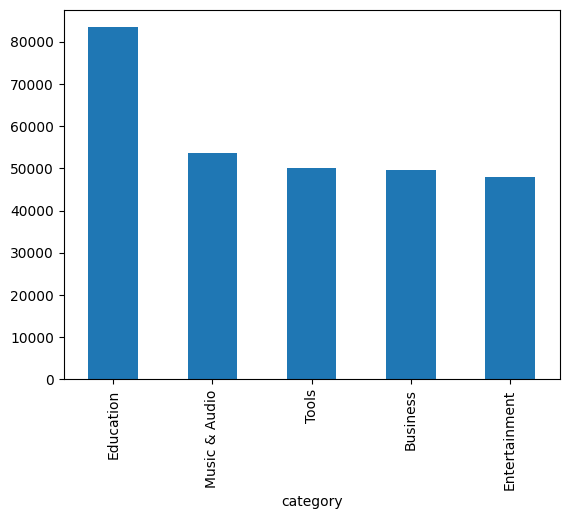

In [80]:
# top categories
df['category'].value_counts().head(5).plot(kind='bar')


<Axes: ylabel='Frequency'>

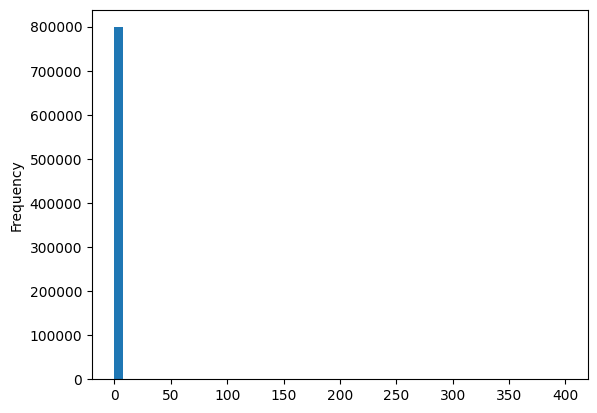

In [81]:
# price distribution
df['price'].dropna().plot(kind='hist', bins=50)

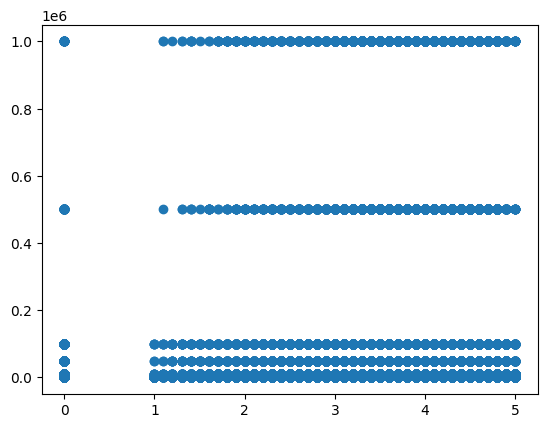

In [82]:
# rating vs installs
plt.scatter(df['rating'], df['installs'].clip(upper=1e6))

### 14) Grouped aggregations + pivot tables (insights)

+ Avg rating by category

+ Avg installs by price band

+ Top paid apps by installs

In [83]:
df.groupby('category')['rating'].agg(['mean','median','count']).sort_values('mean', ascending=False)
df.pivot_table(values='price', index='category', columns='is_paid', aggfunc='mean')


is_paid,False,True
category,,
Action,0.0,3.288150
Adventure,0.0,4.329757
Arcade,0.0,9.528381
Art & Design,0.0,10.355397
Auto & Vehicles,0.0,6.643939
Beauty,0.0,3.690000
Board,0.0,3.730284
Books & Reference,0.0,6.453436
Business,0.0,12.396251


### 15) Save cleaned dataset

### 16) Final checks & documentation

Check df.info() again

Note how many rows dropped, how many nulls remain

Write a short README explaining imputations & decisions

### Quick checklist (do this every time)

 Duplicates removed by App Id

 installs, price, rating numeric

 Dates parsed & days_since_update created

 free/flags standardized

 Missingness strategy recorded

 Outliers inspected & decision taken

 Cleaned dataset exported